# FPL 

An analysis of FPL scores and prices.


In [1]:
import requests
import json
import time
import pandas as pd
import seaborn as sns

def get_data():
    """
    get fpl player data
    """
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    data = json.loads(response.text)
    return data

In [2]:
data = get_data()

In [42]:
teams = pd.DataFrame(data['teams'])
teams = teams.rename(columns={"id": "team_id"})

element_types = pd.DataFrame(data['element_types'])
element_types =  element_types[['id','plural_name','plural_name_short']]
element_types.columns = ['position_id','position','position_short']

players = pd.DataFrame(data['elements'])
players = players.merge(element_types,left_on='element_type',right_on='position_id')
players = players.merge(teams,left_on='team',right_on='team_id')

In [43]:
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code_x,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,NaN,None,58822,0,0,0,0,0,2,2.3,...,None,False,0,1200,1270,1150,1210,1190,1220,1
1,NaN,None,156074,0,0,0,0,0,2,2.3,...,None,False,0,1200,1270,1150,1210,1190,1220,1
2,NaN,None,192895,0,0,0,0,0,2,2.8,...,None,False,0,1200,1270,1150,1210,1190,1220,1
3,NaN,None,198869,0,0,0,0,0,2,2.3,...,None,False,0,1200,1270,1150,1210,1190,1220,1
4,NaN,None,223723,0,0,0,0,0,2,2.3,...,None,False,0,1200,1270,1150,1210,1190,1220,1


In [44]:
# look through for example records
for c in players.columns:
        print('{} : {} and {}'.format(c, players[c].values[0],players[c].values[1]) )

chance_of_playing_next_round : nan and nan
chance_of_playing_this_round : None and None
code_x : 58822 and 156074
cost_change_event : 0 and 0
cost_change_event_fall : 0 and 0
cost_change_start : 0 and 0
cost_change_start_fall : 0 and 0
dreamteam_count : 0 and 0
element_type : 2 and 2
ep_next : 2.3 and 2.3
ep_this : None and None
event_points : 0 and 0
first_name : Cédric and Rob
form_x : 0.0 and 0.0
id : 1 and 5
in_dreamteam : False and False
news :  and 
news_added : None and None
now_cost : 45 and 45
photo : 58822.jpg and 156074.jpg
points_per_game : 2.3 and 1.9
second_name : Alves Soares and Holding
selected_by_percent : 0.3 and 0.2
special : False and False
squad_number : None and None
status : a and a
team : 1 and 1
team_code : 3 and 3
total_points : 48 and 29
transfers_in : 0 and 0
transfers_in_event : 0 and 0
transfers_out : 0 and 0
transfers_out_event : 0 and 0
value_form : 0.0 and 0.0
value_season : 10.7 and 6.4
web_name : Cédric and Holding
minutes : 1481 and 840
goals_scored

In [45]:
df = players[['web_name','position_short','bps','name',
              'total_points','now_cost','minutes']]
df['points_per_90'] = 90 * df['total_points'] / df['minutes']
df = df[df['minutes'] > 750] # take players 
df

/Users/elliottcunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90
0,Cédric,DEF,292,Arsenal,48,45,1481,2.916948
1,Holding,DEF,152,Arsenal,29,45,840,3.107143
2,Tierney,DEF,454,Arsenal,106,50,1916,4.979123
3,White,DEF,557,Arsenal,107,45,2880,3.343750
4,Tomiyasu,DEF,344,Arsenal,75,45,1680,4.017857
...,...,...,...,...,...,...,...,...
546,Podence,MID,257,Wolves,70,55,1475,4.271186
550,Adama,MID,168,Wolves,44,55,1069,3.704397
552,Moutinho,MID,511,Wolves,96,50,2970,2.909091
553,Jiménez,FWD,266,Wolves,101,70,2630,3.456274


In [46]:
p = df.pivot_table(index=['position_short'], values=['total_points','now_cost','minutes',
        'points_per_90'] ,aggfunc=['count','mean','median'])
p

count                                             mean  \
               minutes now_cost points_per_90 total_points      minutes   
position_short                                                            
DEF                116      116           116          116  2012.362069   
FWD                 30       30            30           30  1896.566667   
GKP                 20       20            20           20  2848.950000   
MID                128      128           128          128  1905.679688   

                                                      median           \
                 now_cost points_per_90 total_points minutes now_cost   
position_short                                                          
DEF             47.758621      3.431510    77.629310  2052.5       45   
FWD             72.000000      4.814553    99.533333  1836.5       70   
GKP             48.250000      3.695126   117.900000  3240.0       50   
MID             58.476562      4.065495    86.671875  1890.5       55   

                                           
               points_per_90 total_points  
position_short                             
DEF                 3.245380         73.5  
FWD                 4.717780         95.0  
GKP                 3.643393        129.5  
MID                 3.896679         79.0

In [47]:
for x in df.position_short.unique():
    print('-------------')
    print(df[df['position_short']==x].sort_values(['total_points','position_short'],ascending=[False,True]).head(10))

-------------
             web_name position_short  bps         name  total_points  \
310  Alexander-Arnold            DEF  864    Liverpool           208   
338           Cancelo            DEF  829     Man City           201   
309         Robertson            DEF  770    Liverpool           186   
308          Van Dijk            DEF  803    Liverpool           183   
307             Matip            DEF  763    Liverpool           170   
340           Laporte            DEF  714     Man City           160   
32               Cash            DEF  623  Aston Villa           147   
5             Gabriel            DEF  682      Arsenal           146   
148             James            DEF  573      Chelsea           141   
341              Dias            DEF  622     Man City           141   

     now_cost  minutes  points_per_90  
310        75     2853       6.561514  
338        70     3227       5.605826  
309        70     2537       6.598345  
308        65     3060       5.38

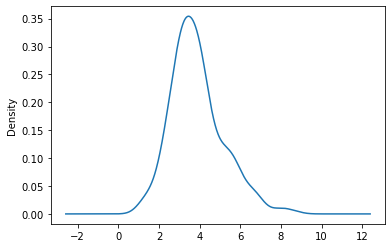

In [48]:
ax = df['points_per_90'].plot.kde()

/Users/elliottcunningham/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


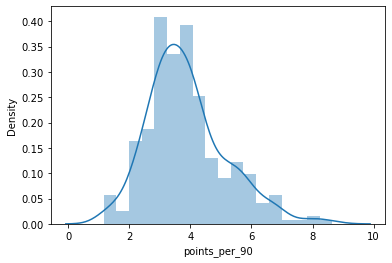

In [49]:
sns.distplot(df['points_per_90'], );

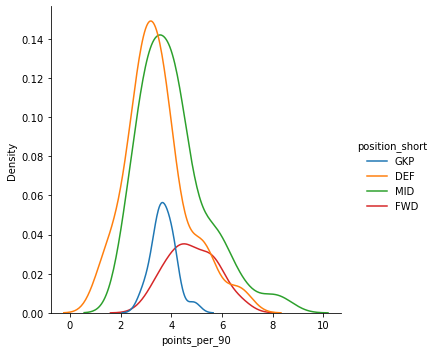

In [50]:
sns.displot(data=df, x='points_per_90', hue="position_short", kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);

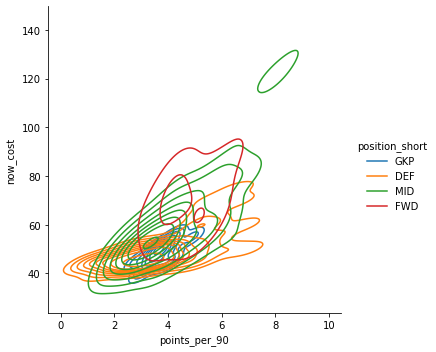

In [51]:
sns.displot(data=df, x='points_per_90',y='now_cost', hue="position_short",kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);

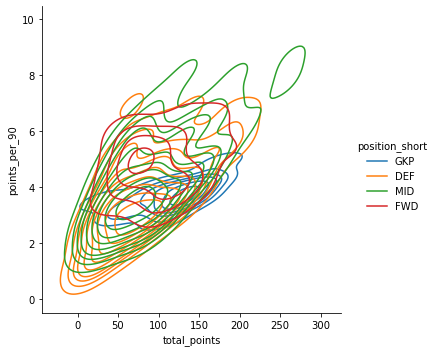

In [52]:
sns.displot(data=df, x='total_points',y='points_per_90', hue="position_short",kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);


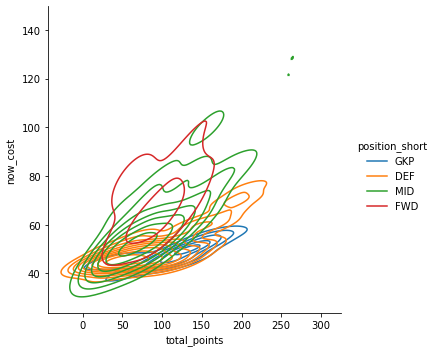

In [53]:
sns.displot(data=df, x='total_points',y='now_cost', hue="position_short",kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);

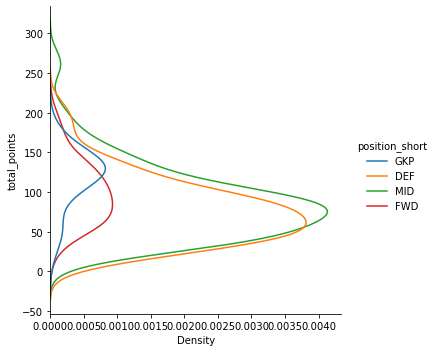

In [54]:
sns.displot(data=df, y='total_points', hue="position_short", kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);

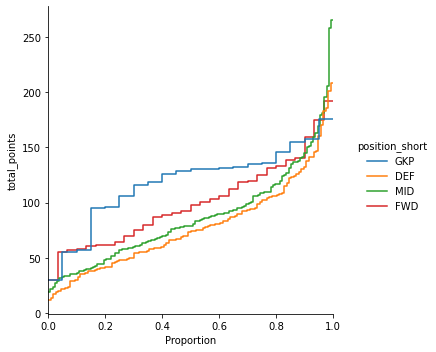

In [55]:
sns.displot(data=df, y='total_points', hue="position_short", kind="ecdf", hue_order = ['GKP', 'DEF', 'MID','FWD']);

In [57]:
df['points_per_90_per_now_cost'] = df['points_per_90'] / df['now_cost']
df['total_points_per_now_cost'] = df['total_points'] / df['now_cost']
df['e_score'] = df['total_points_per_now_cost']  * df['points_per_90']

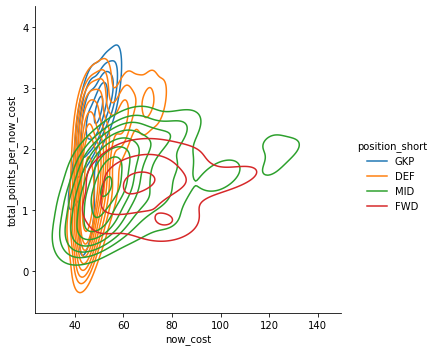

In [58]:
sns.displot(data=df, x='now_cost',y='total_points_per_now_cost', 
            hue="position_short",kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);

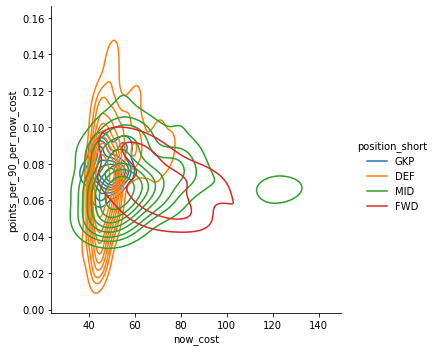

In [73]:
sns.displot(data=df, x='now_cost',y='points_per_90_per_now_cost', hue="position_short",
            kind="kde", hue_order = ['GKP', 'DEF', 'MID','FWD']);

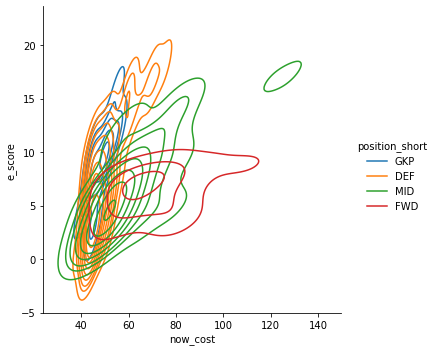

In [74]:
sns.displot(data=df, x='now_cost',y='e_score', hue="position_short",kind="kde",
            hue_order = ['GKP', 'DEF', 'MID','FWD']);

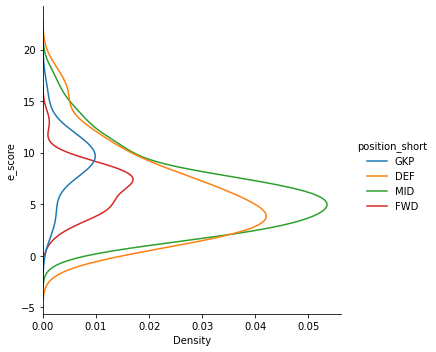

In [75]:
sns.displot(data=df, y='e_score', hue="position_short", kind="kde",
            hue_order = ['GKP', 'DEF', 'MID','FWD']);

In [62]:
df[df['position_short']=='GKP'].sort_values('e_score',ascending=False).head(20)

,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90,points_per_90_per_now_cost,total_points_per_now_cost,e_score
333,Alisson,GKP,782,Liverpool,176,55,3240,4.888889,0.088889,3.200000,15.644444
507,Lloris,GKP,703,Spurs,158,55,3420,4.157895,0.075598,2.872727,11.944498
357,Ederson,GKP,701,Man City,155,55,3330,4.189189,0.076167,2.818182,11.805897
555,Sá,GKP,722,Wolves,146,50,3285,4.000000,0.080000,2.920000,11.680000
26,Ramsdale,GKP,641,Arsenal,135,50,3060,3.970588,0.079412,2.700000,10.720588
193,Guaita,GKP,567,Crystal Palace,119,45,2655,4.033898,0.089642,2.644444,10.667420
531,Fabianski,GKP,661,West Ham,136,50,3330,3.675676,0.073514,2.720000,9.997838
168,Mendy,GKP,573,Chelsea,130,50,3060,3.823529,0.076471,2.600000,9.941176
139,Sánchez,GKP,679,Brighton,126,45,3330,3.405405,0.075676,2.800000,9.535135
417,Pope,GKP,683,Newcastle,130,50,3240,3.611111,0.072222,2.600000,9.388889


In [63]:
df[df['position_short']=='DEF'].sort_values('e_score',ascending=False).head(8)

,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90,points_per_90_per_now_cost,total_points_per_now_cost,e_score
310,Alexander-Arnold,DEF,864,Liverpool,208,75,2853,6.561514,0.087487,2.773333,18.197266
309,Robertson,DEF,770,Liverpool,186,70,2537,6.598345,0.094262,2.657143,17.532744
338,Cancelo,DEF,829,Man City,201,70,3227,5.605826,0.080083,2.871429,16.096728
148,James,DEF,573,Chelsea,141,60,1863,6.811594,0.113527,2.350000,16.007246
307,Matip,DEF,763,Liverpool,170,60,2790,5.483871,0.091398,2.833333,15.537634
308,Van Dijk,DEF,803,Liverpool,183,65,3060,5.382353,0.082805,2.815385,15.153394
340,Laporte,DEF,714,Man City,160,60,2830,5.088339,0.084806,2.666667,13.568905
5,Gabriel,DEF,682,Arsenal,146,50,3063,4.289912,0.085798,2.920000,12.526543


In [64]:
df[df['position_short']=='MID'].sort_values('e_score',ascending=False).head(8)

,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90,points_per_90_per_now_cost,total_points_per_now_cost,e_score
324,Salah,MID,756,Liverpool,265,130,2758,8.647571,0.066520,2.038462,17.627740
490,Son,MID,819,Spurs,258,120,3009,7.716849,0.064307,2.150000,16.591226
522,Bowen,MID,586,West Ham,206,85,2987,6.206897,0.073022,2.423529,15.042596
264,Maddison,MID,637,Leicester,181,80,2454,6.638142,0.082977,2.262500,15.018796
346,Mahrez,MID,477,Man City,135,80,1485,8.181818,0.102273,1.687500,13.806818
159,Mount,MID,597,Chelsea,169,80,2358,6.450382,0.080630,2.112500,13.626431
521,Benrahma,MID,441,West Ham,138,60,2162,5.744681,0.095745,2.300000,13.212766
345,De Bruyne,MID,732,Man City,196,120,2196,8.032787,0.066940,1.633333,13.120219


In [72]:
df[df['position_short']=='FWD'].sort_values('e_score',ascending=False).head(8)

,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90,points_per_90_per_now_cost,total_points_per_now_cost,e_score
331,Diogo Jota,FWD,483,Liverpool,175,90,2357,6.682223,0.074247,1.944444,12.993212
271,Vardy,FWD,480,Leicester,133,95,1801,6.646308,0.069961,1.400000,9.304831
503,Kane,FWD,684,Spurs,192,115,3231,5.348189,0.046506,1.669565,8.929151
384,Ronaldo,FWD,608,Man Utd,159,105,2454,5.831296,0.055536,1.514286,8.830248
25,Jesus,FWD,488,Arsenal,120,80,1871,5.772314,0.072154,1.500000,8.658471
105,Toney,FWD,502,Brentford,139,70,2908,4.301926,0.061456,1.985714,8.542395
190,Edouard,FWD,280,Crystal Palace,87,55,1554,5.038610,0.091611,1.581818,7.970165
529,Antonio,FWD,441,West Ham,140,75,2975,4.235294,0.056471,1.866667,7.905882


In [66]:
# high points and points per 90
df.sort_values('e_score',ascending=False).head(15)

,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90,points_per_90_per_now_cost,total_points_per_now_cost,e_score
310,Alexander-Arnold,DEF,864,Liverpool,208,75,2853,6.561514,0.087487,2.773333,18.197266
324,Salah,MID,756,Liverpool,265,130,2758,8.647571,0.066520,2.038462,17.627740
309,Robertson,DEF,770,Liverpool,186,70,2537,6.598345,0.094262,2.657143,17.532744
490,Son,MID,819,Spurs,258,120,3009,7.716849,0.064307,2.150000,16.591226
338,Cancelo,DEF,829,Man City,201,70,3227,5.605826,0.080083,2.871429,16.096728
148,James,DEF,573,Chelsea,141,60,1863,6.811594,0.113527,2.350000,16.007246
333,Alisson,GKP,782,Liverpool,176,55,3240,4.888889,0.088889,3.200000,15.644444
307,Matip,DEF,763,Liverpool,170,60,2790,5.483871,0.091398,2.833333,15.537634
308,Van Dijk,DEF,803,Liverpool,183,65,3060,5.382353,0.082805,2.815385,15.153394
522,Bowen,MID,586,West Ham,206,85,2987,6.206897,0.073022,2.423529,15.042596


In [67]:
df[(df['now_cost']<=50) ].sort_values(#'total_points_per_now_cost'
                                            'e_score',ascending=False).head(15)

,web_name,position_short,bps,name,total_points,now_cost,minutes,points_per_90,points_per_90_per_now_cost,total_points_per_now_cost,e_score
5,Gabriel,DEF,682,Arsenal,146,50,3063,4.289912,0.085798,2.920000,12.526543
146,Chalobah,DEF,396,Chelsea,99,50,1447,6.157567,0.123151,1.980000,12.191983
555,Sá,GKP,722,Wolves,146,50,3285,4.000000,0.080000,2.920000,11.680000
32,Cash,DEF,623,Aston Villa,147,50,3377,3.917678,0.078354,2.940000,11.517975
482,Reguilón,DEF,438,Spurs,104,45,1914,4.890282,0.108673,2.311111,11.301985
26,Ramsdale,GKP,641,Arsenal,135,50,3060,3.970588,0.079412,2.700000,10.720588
193,Guaita,GKP,567,Crystal Palace,119,45,2655,4.033898,0.089642,2.644444,10.667420
480,Sánchez,DEF,417,Spurs,93,45,1626,5.147601,0.114391,2.066667,10.638376
2,Tierney,DEF,454,Arsenal,106,50,1916,4.979123,0.099582,2.120000,10.555741
172,Andersen,DEF,619,Crystal Palace,124,45,2914,3.829787,0.085106,2.755556,10.553191
